# **Übergewicht und Fettleibigkeit bei Erwachsenen**

Gruppe: Soraya Gfrerer, Adriana Heeb, Selina Käch

## **1.1 Fragestellung**

- Welche 5 Länder/Regionen hatten zwischen den Jahren 1975 und 2016 die grösste Zunahme/Abnahme des Anteils an Übergewichtigen/Fettleibigen?
    - Welches Land weist die extremste Differenz im Anteil der Übergewichtigen auf und wie korreliert diese Differenz mit dem Bruttoinlandprodukt (BIP) des jeweiligen Landes?


## **1.2 Datenquellen**

- https://ourworldindata.org/grapher/share-of-adults-who-are-overweight?tab=chart
- https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=chart



## **1.3 Daten beschaffen und laden**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('share-of-adults-who-are-overweight.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil an Übergewichtigen']) 
df.head()  

,Gebiet,Code,Jahr,Anteil an Übergewichtigen
0,Afghanistan,AFG,1975,6.1
1,Afghanistan,AFG,1976,6.3
2,Afghanistan,AFG,1977,6.5
3,Afghanistan,AFG,1978,6.8
4,Afghanistan,AFG,1979,7.0


# **2. Daten vorbereiten**

In [33]:
df_pivot_allgemein = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')
print(df_pivot_allgemein)

Jahr                   1975  1976  1977  1978  1979  1980  1981  1982  1983  \
Gebiet                                                                        
Afghanistan             6.1   6.3   6.5   6.8   7.0   7.3   7.6   7.9   8.2   
Africa (WHO)           11.6  11.9  12.2  12.5  12.9  13.2  13.6  14.0  14.4   
Albania                33.3  33.8  34.2  34.7  35.1  35.6  36.1  36.5  37.0   
Algeria                30.0  30.6  31.2  31.9  32.6  33.3  34.0  34.8  35.6   
Americas (WHO)         36.6  37.2  37.8  38.5  39.1  39.7  40.4  41.0  41.7   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
Vietnam                 5.0   5.1   5.3   5.4   5.5   5.7   5.8   5.9   6.1   
Western Pacific (WHO)  11.1  11.3  11.6  11.9  12.2  12.5  12.8  13.1  13.5   
Yemen                  19.7  20.2  20.7  21.3  21.8  22.4  23.0  23.5  24.1   
Zambia                 11.8  12.3  12.7  13.1  13.6  14.1  14.5  14.9  15.3   
Zimbabwe               15.8  16.3  16.8  17.3  17.8 

In [46]:
df_pivot_Länder = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')
print(df_pivot_Länder.columns)

df_pivot_Länder_2016 = df_pivot_Länder[2016]

print(df_pivot_Länder_2016)

Index([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Jahr')
Gebiet
Afghanistan              23.0
Africa (WHO)             31.1
Albania                  57.7
Algeria                  62.0
Americas (WHO)           62.5
                         ... 
Vietnam                  18.3
Western Pacific (WHO)    31.7
Yemen                    48.8
Zambia                   27.8
Zimbabwe                 38.2
Name: 2016, Length: 197, dtype: float64


In [29]:
df_pivot_Länder = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')
df_pivot_Länder.head() 

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.1,6.3,6.5,6.8,7.0,7.3,7.6,7.9,8.2,8.4,...,17.7,18.2,18.8,19.3,19.9,20.5,21.1,21.7,22.3,23.0
Africa (WHO),11.6,11.9,12.2,12.5,12.9,13.2,13.6,14.0,14.4,14.8,...,26.1,26.7,27.2,27.8,28.3,28.9,29.4,30.0,30.5,31.1
Albania,33.3,33.8,34.2,34.7,35.1,35.6,36.1,36.5,37.0,37.5,...,51.0,51.8,52.5,53.3,54.0,54.8,55.5,56.3,57.0,57.7
Algeria,30.0,30.6,31.2,31.9,32.6,33.3,34.0,34.8,35.6,36.4,...,55.0,55.8,56.6,57.4,58.2,59.0,59.8,60.5,61.3,62.0
Americas (WHO),36.6,37.2,37.8,38.5,39.1,39.7,40.4,41.0,41.7,42.3,...,57.6,58.1,58.7,59.2,59.8,60.3,60.9,61.4,62.0,62.5


# **3. Rohdaten Analyse (im Longformat)**

##### **Beobachtung:**
- Die Rohdaten beinhalten Länder, Regionen und Kontinente
- Die Spalte Gebiete enthält 197 verschiedene Gebiete
- Jedes Gebiet hat gleich viele Datenpunkte: 42
- Die Spalte Codes enthält 191 verschiedene Codes
- Jedes Gebiet hat für jedes Jahr Datenpunkte vorhanden
- Es sind Daten zwischen den Jahren 1975 und 2016 vorhanden
- Der Anteil an Übergewichtigen streut zwischen XX und XX Prozent

In [24]:
df.dtypes

Gebiet                        object
Code                          object
Jahr                           int64
Anteil an Übergewichtigen    float64
dtype: object

## **3.1 Analyse Gebiete**

In [3]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  197


In [9]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

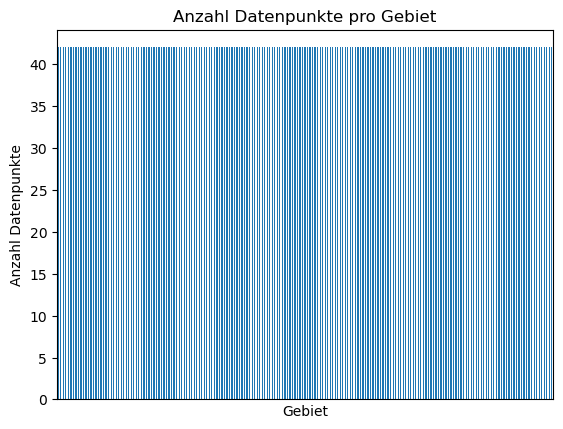

In [10]:
df['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],  
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

## **3.2 Analyse Codes**



In [11]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  191


In [12]:
df['Code'].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

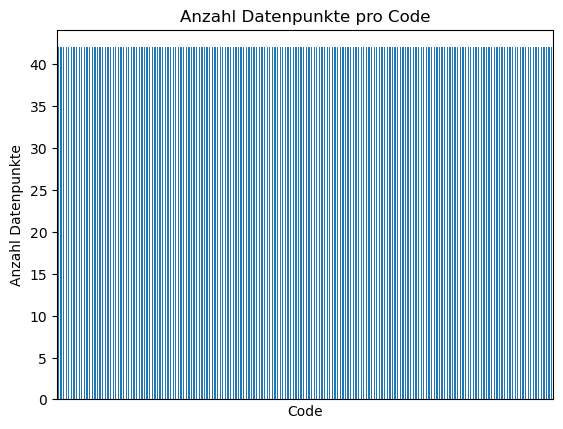

In [13]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

## **3.3 Analyse Jahr**

In [14]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  42


In [15]:
df['Jahr'].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

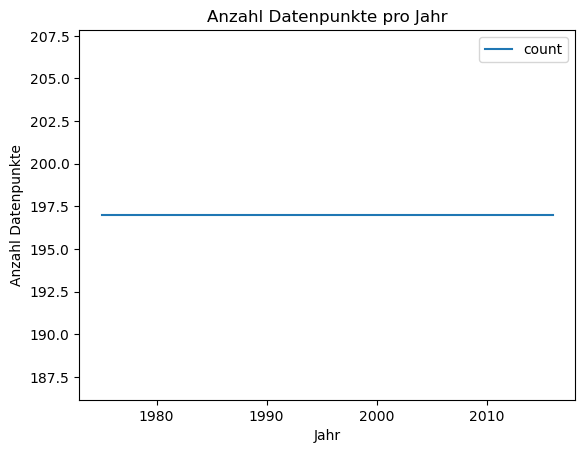

In [17]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

## **3.4 Analyse Anteil an Übergewichtigen**

In [4]:
df.describe()

,Jahr,Anteil an Übergewichtigen
count,8274.000000,8274.000000
mean,1995.500000,37.510769
std,12.121651,17.912172
min,1975.000000,4.600000
25%,1985.000000,21.300000
50%,1995.500000,39.300000
75%,2006.000000,51.500000
max,2016.000000,88.500000


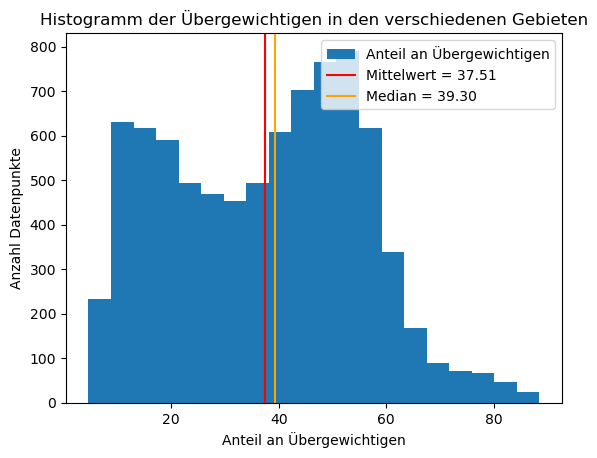

In [6]:
g = df['Anteil an Übergewichtigen'].plot(kind='hist', bins=20, title='Histogramm der Übergewichtigen in den verschiedenen Gebieten', 
                           xlabel='Anteil an Übergewichtigen', ylabel='Anzahl Datenpunkte')
mean = df['Anteil an Übergewichtigen'].mean()
g.axvline(x=df['Anteil an Übergewichtigen'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Anteil an Übergewichtigen'].median()
g.axvline(x=df['Anteil an Übergewichtigen'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

c:\Users\soray\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


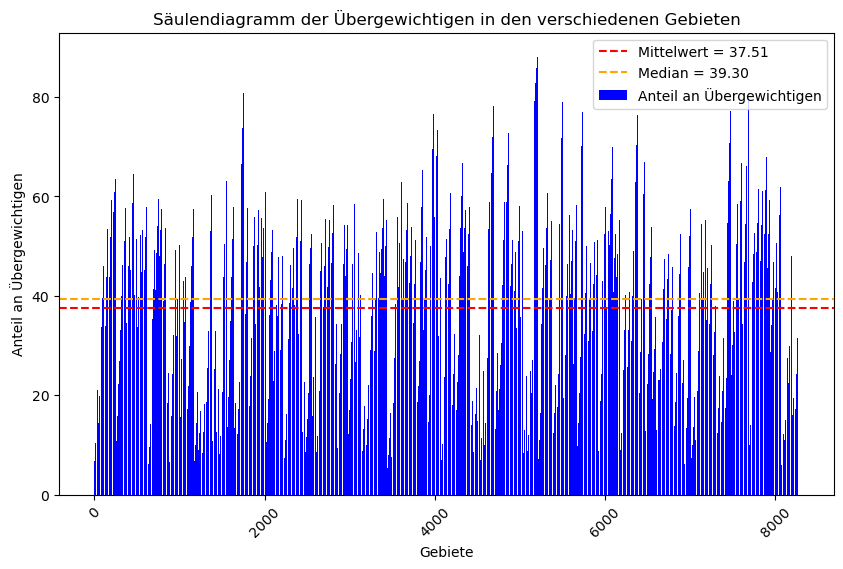

In [5]:
import matplotlib.pyplot as plt

# Daten für das Säulendiagramm vorbereiten
categories = df.index  # Falls es Kategorien gibt, z. B. Gebiete oder andere Gruppen
values = df['Anteil an Übergewichtigen']  # Die entsprechenden Werte

# Säulendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='blue', label='Anteil an Übergewichtigen')

# Mittelwert und Median berechnen
mean = df['Anteil an Übergewichtigen'].mean()
median = df['Anteil an Übergewichtigen'].median()

# Mittelwert- und Median-Linien hinzufügen
plt.axhline(y=mean, color='red', linestyle='--', label=f'Mittelwert = {mean:.2f}')
plt.axhline(y=median, color='orange', linestyle='--', label=f'Median = {median:.2f}')

# Titel und Achsentitel hinzufügen
plt.title('Säulendiagramm der Übergewichtigen in den verschiedenen Gebieten')
plt.xlabel('Gebiete')  # Passe an, falls "categories" etwas anderes als Gebiete sind
plt.ylabel('Anteil an Übergewichtigen')

# X-Achse rotieren, falls nötig
plt.xticks(rotation=45)

# Legende hinzufügen
plt.legend()

# Diagramm anzeigen
plt.show()


c:\Users\soray\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


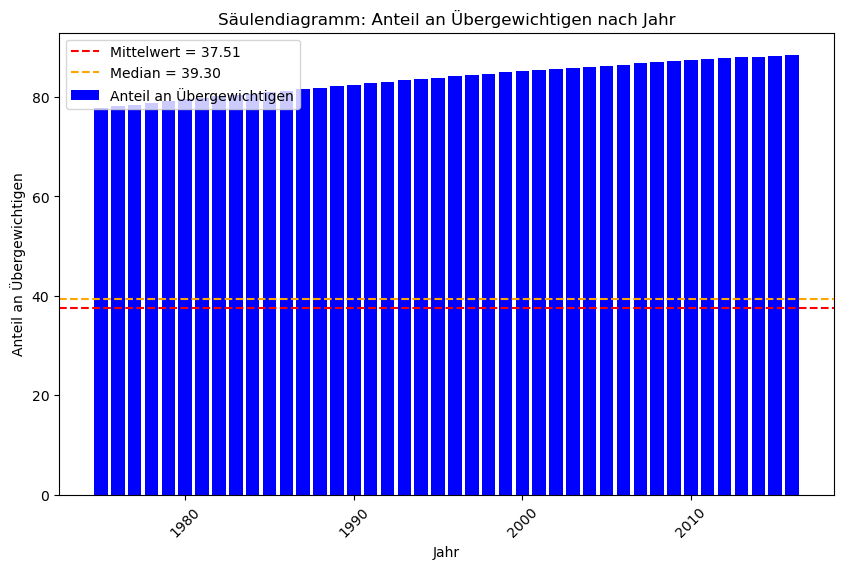

In [3]:
import matplotlib.pyplot as plt

x = df['Jahr']  
y = df['Anteil an Übergewichtigen']  

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='blue', label='Anteil an Übergewichtigen')

mean = y.mean()
median = y.median()

plt.axhline(y=mean, color='red', linestyle='--', label=f'Mittelwert = {mean:.2f}')
plt.axhline(y=median, color='orange', linestyle='--', label=f'Median = {median:.2f}')

plt.title('Säulendiagramm: Anteil an Übergewichtigen nach Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anteil an Übergewichtigen')

plt.xticks(rotation=45)

plt.legend()

plt.show()


# **4. Analyse**

### **Vorgehen**  

### **Beobachtungen**  
- Die 5 Länder/Regionen mit dem höchsten Anteil an Übergewichtigen sind: Naurau, Palau, Cook Islands, Marshall Islands und Tuvalu
- Die 5 Länder/Regionen mit dem niedrigsten Anteil an Übergewichtigen sind: Bangladesh, Vietnam, India, Nepal und East Timor
- Die grösste Differenz des Anteils an Übergewichtigen haben die Länder/Regionen zwischen den Jahren 1975-2016: Oman, Haiti, Dominican Republic, Costa Rica und Dominica
- Die kleinste Different des Anteils an Übergewichtigen haben die Länder/Regionen zwischen den Jahren 1975-2016: Singapore, Nauru, Estonia, Japan und Vietnam

### **Interpretation**  
sdlfköslkdf

### **Berechnungen**

In [9]:
diffs = df_pivot_allgemein[2016]-df_pivot_allgemein[1975]   # Differenz zwischen 2016 und 1975
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Singapore              9.2
Nauru                 10.8
Estonia               12.3
Japan                 12.3
Vietnam               13.3
                      ... 
Dominica              33.0
Costa Rica            33.6
Dominican Republic    34.7
Haiti                 35.2
Oman                  36.3
Length: 197, dtype: float64

<Axes: title={'center': 'Kleinste Differenzen der Übergewichtigen zwischen 1975 und 2016'}, ylabel='Gebiet'>

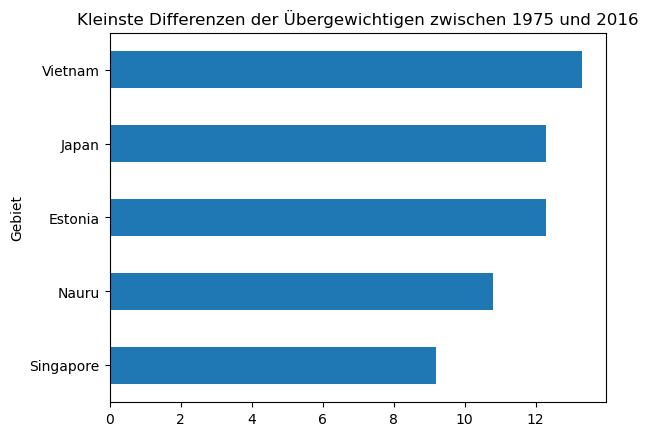

In [31]:
diff_sel_kleinste = (diffs < 13.5) # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel_kleinste].plot(kind='barh', title='Kleinste Differenzen der Übergewichtigen zwischen 1975 und 2016')

<Axes: title={'center': 'Grösste Differenzen der Übergewichtigen zwischen 1975 und 2016'}, ylabel='Gebiet'>

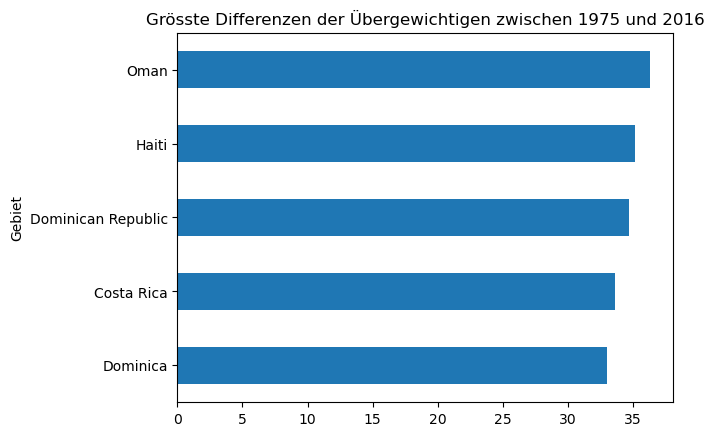

In [32]:
diff_sel_grösste = (diffs > 32.9) # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel_grösste].plot(kind='barh', title='Grösste Differenzen der Übergewichtigen zwischen 1975 und 2016')

In [33]:
Gebiets_liste_kleinsten = diffs[diff_sel_kleinste].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Singapore', 'Nauru', 'Estonia', 'Japan', 'Vietnam']


In [36]:
Gebiets_liste_grösste = diffs[diff_sel_grösste].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Singapore', 'Nauru', 'Estonia', 'Japan', 'Vietnam']


### **Visualisierung**

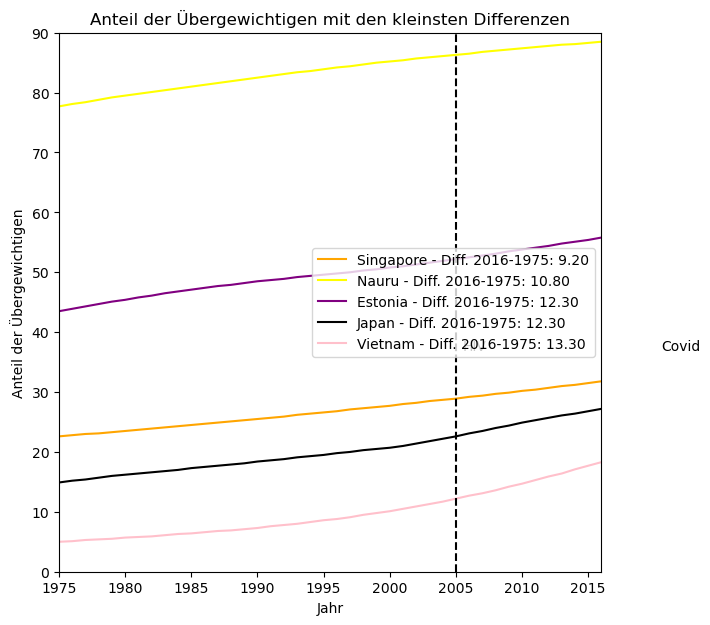

In [38]:
color_dict = {
    'Vietnam': 'pink',
    'Japan': 'black',
    'Estonia': 'purple',
    'Nauru' : 'yellow',
    'Singapore': 'orange'
}

for gebiet in Gebiets_liste_kleinsten:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Anteil der Übergewichtigen mit den kleinsten Differenzen', xlabel='Jahr', ylabel=f'Anteil der Übergewichtigen', legend=True,
                                  label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', # für die Legende
                                  xlim=[1975,2016], ylim=[0,90],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

# Covid Pandemie    
g.axvline(x=2020, color='black', linestyle='--') 
g.text(2020.5, 37, 'Covid')  

# HIV Pandemie
g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'HIV');

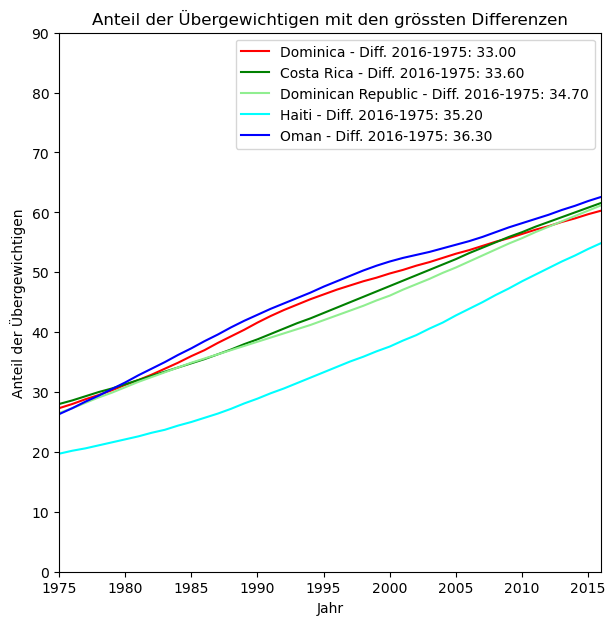

In [39]:
color_dict = {
    'Oman': 'blue',
    'Haiti': 'cyan',
    'Dominican Republic': 'lightgreen',
    'Costa Rica': 'green',
    'Dominica': 'red',

}

for gebiet in Gebiets_liste_grösste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='Anteil der Übergewichtigen mit den grössten Differenzen', xlabel='Jahr', ylabel=f'Anteil der Übergewichtigen', legend=True,
                                  label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', # für die Legende
                                  xlim=[1975,2016], ylim=[0,90],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

In [23]:
top_5_countries = df.sort_values

print(top_5_countries)

<bound method DataFrame.sort_values of            Gebiet Code  Jahr  Anteil an Übergewichtigen
0     Afghanistan  AFG  1975                        6.1
1     Afghanistan  AFG  1976                        6.3
2     Afghanistan  AFG  1977                        6.5
3     Afghanistan  AFG  1978                        6.8
4     Afghanistan  AFG  1979                        7.0
...           ...  ...   ...                        ...
8269     Zimbabwe  ZWE  2012                       36.6
8270     Zimbabwe  ZWE  2013                       37.0
8271     Zimbabwe  ZWE  2014                       37.3
8272     Zimbabwe  ZWE  2015                       37.7
8273     Zimbabwe  ZWE  2016                       38.2

[8274 rows x 4 columns]>


In [21]:
# Annahme: Dein DataFrame heißt df und enthält die Spalten 'Anteil an Übergewichtigen' und 'Jahr'
top_5_niedrigste_werte = df.nsmallest(5, 'Anteil an Übergewichtigen')

# Ausgabe der Top 5 niedrigsten Werte
print(top_5_niedrigste_werte)


Empty DataFrame
Columns: [Jahr, Anteil an Übergewichtigen]
Index: []


In [41]:
df_pivot = df.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')

df_pivot['max_anteil'] = df_pivot.max(axis=1)

df_pivot['min_anteil'] = df_pivot.min(axis=1)

top_5_hoechster_anteil = df_pivot['max_anteil'].nlargest(5)

top_5_niedrigster_anteil = df_pivot['min_anteil'].nsmallest(5)

print("Top 5 Länder mit dem höchsten Anteil an Übergewichtigen (maximale Werte über alle Jahre):")
print(top_5_hoechster_anteil)

print("\nTop 5 Länder mit dem niedrigsten Anteil an Übergewichtigen (minimale Werte über alle Jahre):")
print(top_5_niedrigster_anteil)


Top 5 Länder mit dem höchsten Anteil an Übergewichtigen (maximale Werte über alle Jahre):
Gebiet
Nauru               88.5
Palau               85.1
Cook Islands        84.7
Marshall Islands    83.5
Tuvalu              81.9
Name: max_anteil, dtype: float64

Top 5 Länder mit dem niedrigsten Anteil an Übergewichtigen (minimale Werte über alle Jahre):
Gebiet
Bangladesh    4.6
Vietnam       5.0
India         5.3
Nepal         5.3
East Timor    5.5
Name: min_anteil, dtype: float64


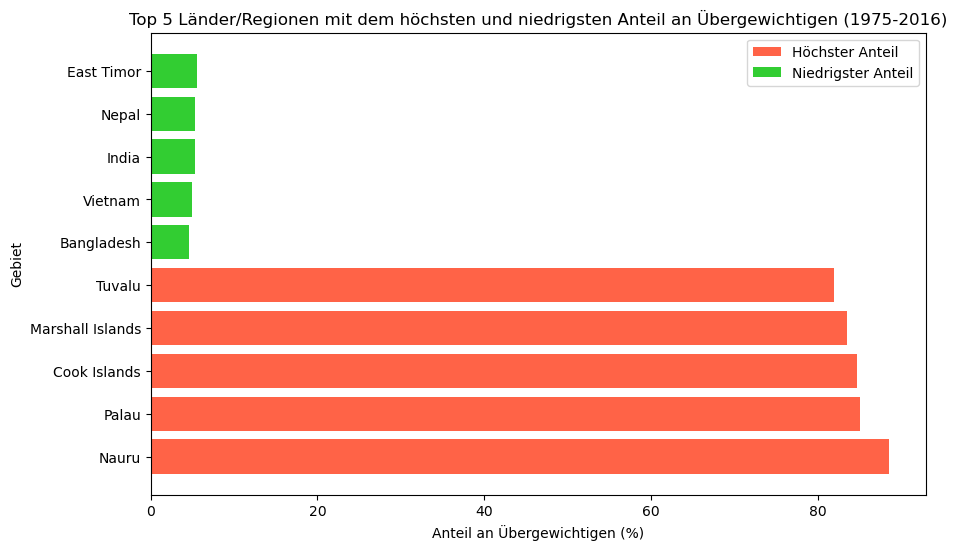

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(top_5_hoechster_anteil.index, top_5_hoechster_anteil, color='tomato', label='Höchster Anteil')

plt.barh(top_5_niedrigster_anteil.index, top_5_niedrigster_anteil, color='limegreen', label='Niedrigster Anteil')

plt.xlabel('Anteil an Übergewichtigen (%)')
plt.ylabel('Gebiet')
plt.title('Top 5 Länder/Regionen mit dem höchsten und niedrigsten Anteil an Übergewichtigen (1975-2016)')
plt.legend()

plt.show()
